# Homework: Анализ данных – MegaSuperPro 
Возьмите базу квартир (moscow.csv). Проведите парсинг и очистку данных. Проанализируйте зависимость стоимости квартир от различных параметров (количество комнат, станции метро и т. д.). Постройте графики.


In [9]:
# Статический вывод графики (графики отображаются в той ячейке, в которой используется plt.show())
import pandas as pd # Импортируем библиотеку обработки и анализа данных pandas
import matplotlib.pyplot as plt # Импортируем модуль pyplot библиотеки matplotlib для построения графиков
import datetime                 # Импортируем модуль datetime для обработки данных в формете даты
import numpy as np              # Импортируем библиотеку numpy
#from google.colab import files  # Импортируем библиотеку files для работы с файлами
import re                       # Регулярные выражения


# Загрузка данных
data = pd.read_csv('C:\Python Projects\lab-project-2\datasets\moscow.csv', sep=';')
# Удаление строк "Для заметок"
data = data[data['Комнат'] != 'Для заметок:']
# Удаление столбцов "ГРМ" и "Примечания"
data.drop(['ГРМ', 'Примечание'], axis=1, inplace=True)
# Замена NaN в столбце "Балкон" на "Отсутствует"
data['Балкон'] = data['Балкон'].fillna('Отсутствует')
# Преобразование столбца "Бонус агенту" в тысячи рублей и заполнение пустых значений нулями
data['Бонус агенту'] = data['Бонус агенту'].fillna('0')
data['Бонус агенту'] = data['Бонус агенту'].replace('[^\d.]', '', regex=True).astype(float) / 1000
# Извлечение общей площади из столбца "Площадь" (иногда почему-то попадаются даты рождения, нам это нужно отловить)
def extract_total_area(area):
    try:
        return float(area.split('/')[0])
    except:
        pass

# Запишем общую площадь
data['Площадь'] = data['Площадь'].apply(lambda x: extract_total_area(x) if isinstance(x, str) else 0)
# Заполнение отсутствующих значений в столбце "Санузел"
data['Санузел'] = data['Санузел'].fillna('Нет данных')
# Преобразование столбца "Цена, руб." в тысячи рублей
data['Цена, руб.'] = data['Цена, руб.'].apply(lambda x: x / 1000 if pd.notnull(x) else x)

# Проверка результатов
data.head()


,Комнат,Метро / ЖД станции,От станции,Дом,Балкон,Санузел,Площадь,"Цена, руб.",Бонус агенту,Дата,Кол-во дней в экспозиции,Источник
0,1,Шелепиха м.,12п,35/37 М,Отсутствует,2,64.1,19500.0,0.0,25.07.2019,1.0,Привлекательные
2,1,Пятницкое шоссе м.,30т,11/14 П,Л,Р,38.4,4800.0,0.0,25.07.2019,2.0,Привлекательные
4,1,Планерная м.,5т,11/22 П,Б,С,38.2,7990.0,0.0,25.07.2019,4.0,Привлекательные
6,1,Шаболовская м.,12п,8/12 ?,Б,Р,38.0,11200.0,0.0,25.07.2019,7.0,Привлекательные
8,1,Бабушкинская м.,15п,4/14 П,Отсутствует,С,34.0,6250.0,0.0,25.07.2019,NaN,Привлекательные


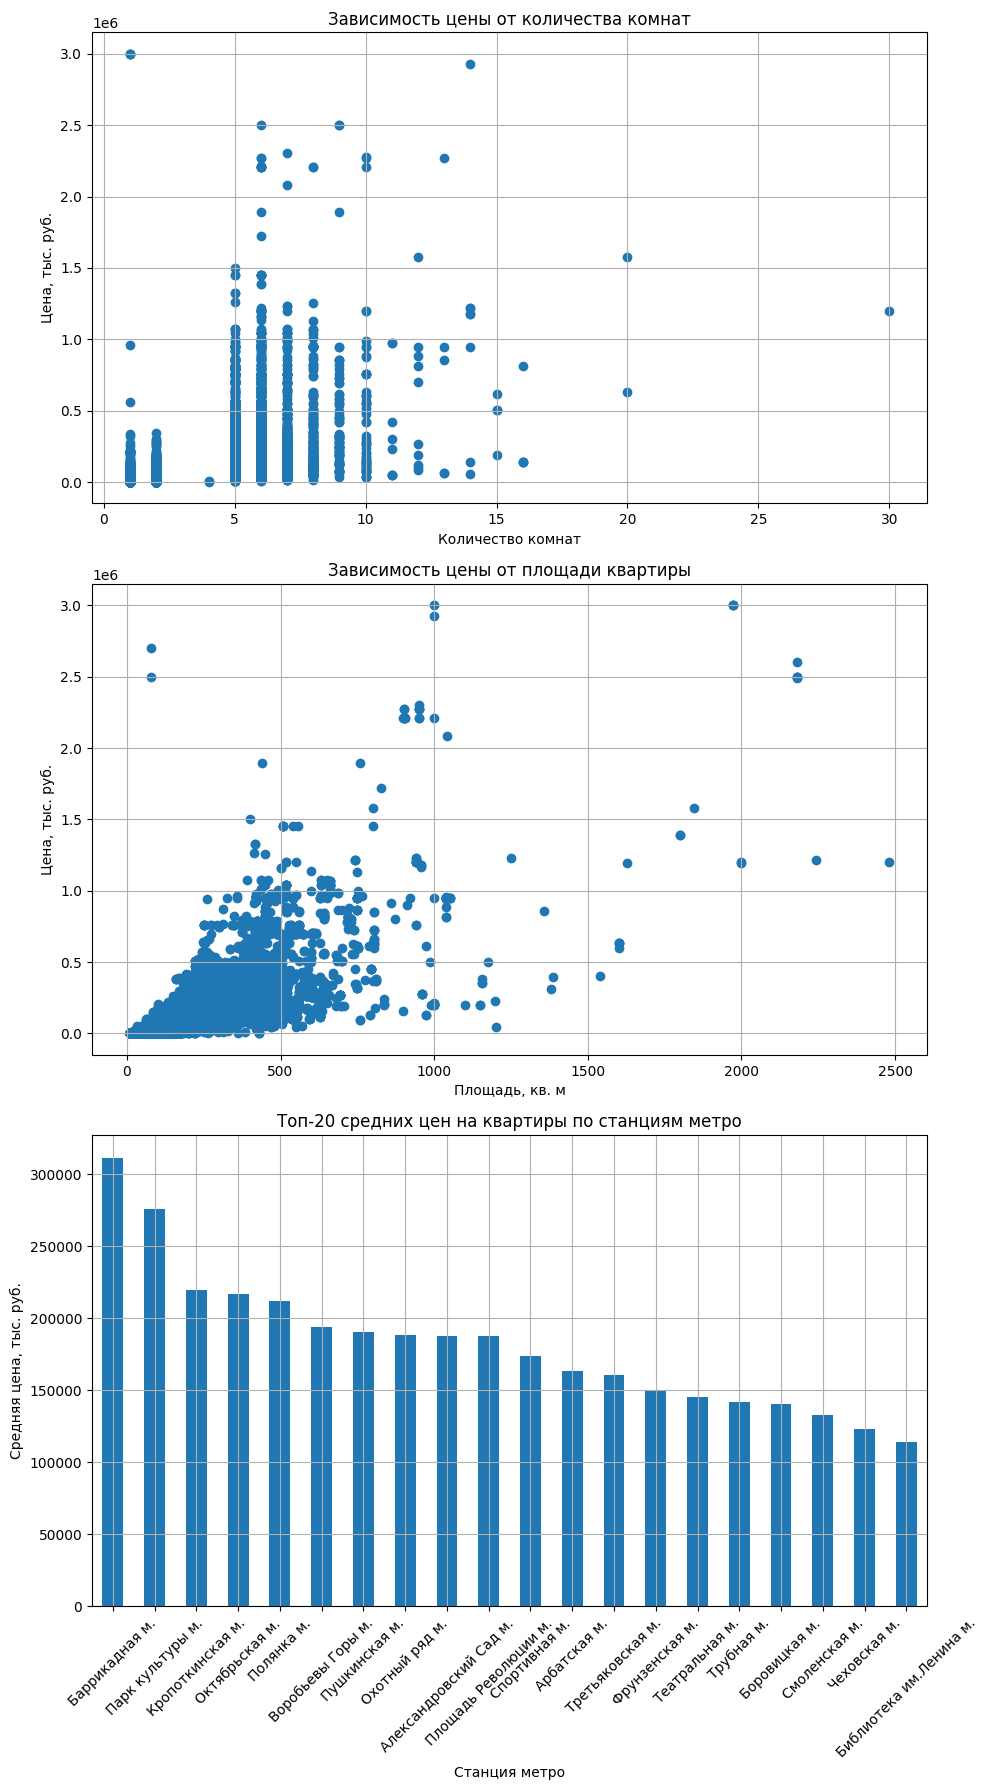

In [11]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18))  # 3 графика, расположенные вертикально

# График 1
data['Комнат'] = pd.to_numeric(data['Комнат'], errors='coerce')
axs[0].scatter(data['Комнат'], data['Цена, руб.'])
axs[0].set_title('Зависимость цены от количества комнат')
axs[0].set_xlabel('Количество комнат')
axs[0].set_ylabel('Цена, тыс. руб.')
axs[0].grid(True)

# График 2
axs[1].scatter(data['Площадь'], data['Цена, руб.'])
axs[1].set_title('Зависимость цены от площади квартиры')
axs[1].set_xlabel('Площадь, кв. м')
axs[1].set_ylabel('Цена, тыс. руб.')
axs[1].grid(True)

# График 3
avg_price_per_station = data.groupby('Метро / ЖД станции')['Цена, руб.'].mean().sort_values(ascending=False)
avg_price_per_station.head(20).plot(kind='bar', ax=axs[2])
axs[2].set_title('Топ-20 средних цен на квартиры по станциям метро')
axs[2].set_xlabel('Станция метро')
axs[2].set_ylabel('Средняя цена, тыс. руб.')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45)
axs[2].grid(True)

plt.tight_layout()
plt.show()
